In [170]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("films_dataset1.csv", sep=';')
df.head()

,tconst,averageRating,numVotes,Title,startYear,runtimeMinutes,genres,director
0,tt10620868,6.3,45132,#Alive,2020,98,"Action,Drama,Horror",Il Cho
1,tt9850370,6.6,1726,#Anne Frank Parallel Stories,2019,92,"Documentary,Drama,History",NaN
2,tt6856592,3.1,1188,#Captured,2017,81,"Horror,Thriller",Joe Homokay
3,tt10534500,8.8,14391,#Home,2021,158,Drama,Rojin Thomas
4,tt3526286,3.0,3866,#Horror,2015,97,"Crime,Drama,Horror",Tara Subkoff


In [171]:
df.shape

(40889, 8)

In [172]:
df.rename(columns={'tconst':'id','averageRating':'rating', 'numVotes':'votes', 'Title':'title', 'startYear':'release_year', 'runtimeMinutes':'runtime'}, inplace=True)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40889 entries, 0 to 40888
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            40889 non-null  object 
 1   rating        40889 non-null  float64
 2   votes         40889 non-null  int64  
 3   title         40889 non-null  object 
 4   release_year  40889 non-null  int64  
 5   runtime       40889 non-null  object 
 6   genres        40889 non-null  object 
 7   director      37636 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.5+ MB


## **Cleaning dataset**

Transfer type of runtimeAverage column to numeric type: 
(Non numeric data will be replaced by NaN)

In [174]:
df.runtime=pd.to_numeric(df.runtime,  errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40889 entries, 0 to 40888
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            40889 non-null  object 
 1   rating        40889 non-null  float64
 2   votes         40889 non-null  int64  
 3   title         40889 non-null  object 
 4   release_year  40889 non-null  int64  
 5   runtime       40816 non-null  float64
 6   genres        40889 non-null  object 
 7   director      37636 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.5+ MB


Finding duplicates in id column:

In [175]:
df[df.duplicated(subset=['id'], keep=False)].sort_values(by='id')

,id,rating,votes,title,release_year,runtime,genres,director
8636,tt0068152,6.3,21129,$,1971,121.0,"Comedy,Crime,Drama",Richard Brooks
10,tt0068152,6.3,2806,$,1971,121.0,"Comedy,Crime,Drama",Richard Brooks
8637,tt1024733,6.3,21129,$5 a Day,2008,98.0,"Comedy,Drama",Nigel Cole
11,tt1024733,6.3,3588,$5 a Day,2008,98.0,"Comedy,Drama",Nigel Cole
3,tt10534500,8.8,14391,#Home,2021,158.0,Drama,Rojin Thomas
8629,tt10534500,8.9,21133,#Home,2021,158.0,Drama,Rojin Thomas
0,tt10620868,6.3,45132,#Alive,2020,98.0,"Action,Drama,Horror",Il Cho
8626,tt10620868,6.9,21135,#Alive,2020,98.0,"Action,Drama,Horror",Il Cho
8635,tt2075318,5.7,21130,#Stuck,2014,82.0,"Comedy,Drama,Romance",Stuart Acher
9,tt2075318,5.6,1229,#Stuck,2014,82.0,"Comedy,Drama,Romance",Stuart Acher


Delete duplicates:

In [176]:
df.drop_duplicates(subset=['id'], inplace=True)

In [177]:
df.id.value_counts()

tt10620868    1
tt0458481     1
tt0145893     1
tt6405126     1
tt13130024    1
             ..
tt0040444     1
tt4026562     1
tt0089753     1
tt7453044     1
tt9015306     1
Name: id, Length: 40876, dtype: int64

### Data overview

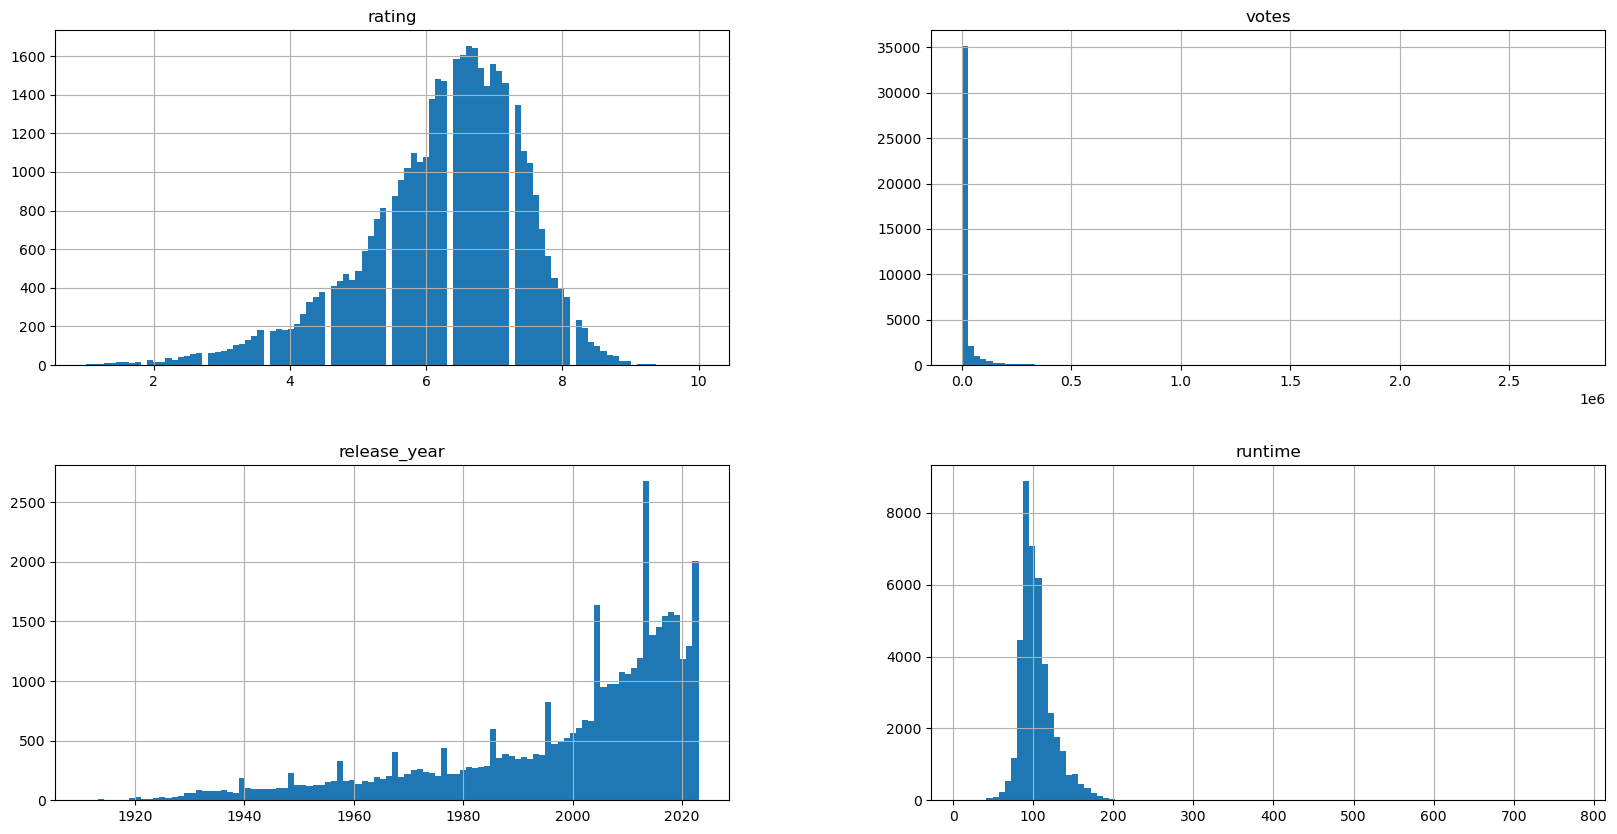

In [178]:
df.hist(figsize=(20,10), bins = 100)
plt.show()

The five oldest films:

In [179]:
(df.sort_values('release_year')).head(5)

,id,rating,votes,title,release_year,runtime,genres,director
7572,tt0002130,7.0,3234,Dante's Inferno,1911,71.0,"Adventure,Drama,Fantasy",NaN
10391,tt0003037,6.9,1636,Fantomas: The Man in Black,1913,61.0,"Crime,Drama",Louis Feuillade
35979,tt0003419,6.4,2294,The Student of Prague,1913,85.0,"Drama,Fantasy,Horror",NaN
15381,tt0003014,7.0,1357,Ingeborg Holm,1913,96.0,Drama,Victor Sjöström
10388,tt0002844,6.9,2417,Fantômas: In the Shadow of the Guillotine,1913,54.0,"Crime,Drama",Louis Feuillade


The five longest films:

In [180]:
(df.sort_values('runtime', ascending=False)).head(5)

,id,rating,votes,title,release_year,runtime,genres,director
22885,tt0246135,7.5,1481,Out 1,1971,776.0,"Drama,Mystery",NaN
9974,tt7528992,7.2,1744,Europa: The Last Battle,2017,746.0,"Documentary,History,War",Tobias B.
26987,tt0090015,8.7,10069,Shoah,1985,566.0,"Documentary,History,War",Claude Lanzmann
37398,tt0389448,8.2,1271,Tie Xi Qu: West of the Tracks,2002,551.0,Documentary,Wang Bing
9737,tt0196530,3.7,1398,Empire,1964,485.0,Documentary,NaN


The five shortest films:

In [181]:
(df.sort_values('runtime')).head(5)

,id,rating,votes,title,release_year,runtime,genres,director
25050,tt4201180,8.8,3286,Regular Show,2009,11.0,\N,NaN
10892,tt0032475,6.6,1466,Flash Gordon Conquers the Universe,1940,20.0,"Action,Adventure,Family",NaN
9930,tt15387782,4.2,1076,Escape the Undertaker,2021,31.0,"Comedy,Horror,Mystery",Ben Simms
19142,tt27903262,1.4,1082,Making of the Meme King,2023,43.0,"Documentary,Fantasy,Horror",NaN
39158,tt6024606,7.1,2354,Voyage of Time,2016,44.0,"Animation,Documentary",Terrence Malick


The average lenght of film in minutes:

In [182]:
round(df['runtime'].mean())

105

The films with the best rating:

In [183]:
(df.sort_values('rating', ascending=False)).head(5)

,id,rating,votes,title,release_year,runtime,genres,director
24996,tt15716828,10.0,1030,Red Sandal Wood,2023,94.0,"Action,Thriller",Guru Ramaanujam
38658,tt28145495,9.8,8089,Uruttu Tech,2023,66.0,Comedy,Pcdoc Nandha
23170,tt28372289,9.7,1095,Paramporul,2023,146.0,"Action,Thriller",C. Aravind Raj
19447,tt26502225,9.6,1021,Mariguddada Gaddadharigalu,2023,146.0,Thriller,R Chandrakant
35624,tt16747572,9.5,10445,The Silence of Swastika,2021,56.0,"Documentary,History",Anuj Bhardwaj


The films with the best rating (over 100,000 votes)

In [184]:
((df.loc[df.votes > 100000]).sort_values('rating', ascending=False)).head(5)

,id,rating,votes,title,release_year,runtime,genres,director
35565,tt0111161,9.3,2799010,The Shawshank Redemption,1994,142.0,Drama,Frank Darabont
32172,tt0068646,9.2,1950101,The Godfather,1972,175.0,"Crime,Drama",Francis Ford Coppola
32173,tt0071562,9.0,1324463,The Godfather Part II,1974,202.0,"Crime,Drama",Francis Ford Coppola
31120,tt0468569,9.0,2780231,The Dark Knight,2008,152.0,"Action,Crime,Drama",Christopher Nolan
33693,tt0167260,9.0,1916434,The Lord of the Rings: The Return of the King,2003,201.0,"Action,Adventure,Drama",Peter Jackson


### Function for searching film by assigned criteria

In [185]:
def search_film (n, genre, by='rating', runtime_max=360, year_min = 0, votes_min = 0, rating_min= 0):
    
    df2=df.loc[(df.genres.str.contains(genre)) & (df.runtime <= runtime_max) & (df.release_year >= year_min) & (df.votes >= votes_min) & (df.rating >= rating_min)].sort_values(by=by, ascending=False).head(3).copy()
    return df2

5 Comedies with over 100,000 votes,  maximum runtime 120 minutes, minimum rating 6, released after 2000:

In [186]:
search_film(5, 'Comedy', 'rating', 120, 2000, 100000, 6)


,id,rating,votes,title,release_year,runtime,genres,director
32977,tt1675434,8.5,897860,The Intouchables,2011,112.0,"Biography,Comedy,Drama",NaN
8565,tt8110330,8.4,133553,Dil Bechara,2020,101.0,"Comedy,Drama,Romance",Mukesh Chhabra
38613,tt1049413,8.3,1090079,Up,2009,96.0,"Adventure,Animation,Comedy",NaN


5 Dramas with over 100,000 votes, maximum runtime 120 minutes, minimum rating 6, released after 2010:

In [187]:
search_film(5, 'Drama', 'rating', 120, 2010, 100000, 6)

,id,rating,votes,title,release_year,runtime,genres,director
32977,tt1675434,8.5,897860,The Intouchables,2011,112.0,"Biography,Comedy,Drama",NaN
39813,tt2582802,8.5,931743,Whiplash,2014,106.0,"Drama,Music",Damien Chazelle
40639,tt5311514,8.4,298896,Your Name.,2016,106.0,"Animation,Drama,Fantasy",Makoto Shinkai


### The most succesful director

In [188]:
df.director.value_counts().head(20)

Alfred Hitchcock     52
Michael Curtiz       49
Woody Allen          48
John Ford            42
Takashi Miike        40
Raoul Walsh          40
Clint Eastwood       39
Ingmar Bergman       39
Fritz Lang           37
Werner Herzog        36
George Cukor         36
Henry Hathaway       36
Roger Corman         36
Kartal Tibet         35
Steven Soderbergh    35
Sidney Lumet         35
Claude Chabrol       34
Steven Spielberg     33
Martin Scorsese      33
Robert Altman        32
Name: director, dtype: int64

In [189]:
director=df.groupby('director').agg({'title':'count', 'rating':'mean', 'votes':'mean'})
director

,title,rating,votes
director,,,
?ke Lindman,1,6.500000,1639.000000
?ke Sandgren,1,6.500000,2135.000000
A. Dean Bell,1,6.500000,1036.000000
A. Edward Sutherland,6,6.500000,2601.666667
A. Karunakaran,4,7.225000,3156.500000
...,...,...,...
Özer Kiziltan,1,7.400000,13211.000000
Özgür Bakar,1,3.300000,1262.000000
Özgür Dogruöz,1,2.700000,2662.000000


The best directors with more than 10 films, average votes per one film more than 100,000 and sorted by average rating:

In [190]:
director.loc[(director.votes >100000) & (director.title > 10)].sort_values('rating', ascending=False).head(10)

,title,rating,votes
director,,,
Christopher Nolan,12,8.200000,1.278962e+06
Hayao Miyazaki,11,7.963636,2.631708e+05
Quentin Tarantino,12,7.875000,8.695597e+05
Stanley Kubrick,12,7.750000,4.072520e+05
Peter Jackson,15,7.706667,5.779353e+05
David Fincher,11,7.663636,7.783720e+05
Martin Scorsese,33,7.548485,3.016758e+05
Milos Forman,12,7.483333,1.515078e+05
David Lynch,11,7.445455,1.492775e+05
